In [10]:
import cv2
import math
import imutils
import numpy as np
import matplotlib.pyplot as plt

from skimage.morphology import skeletonize
from utils import build_sknw

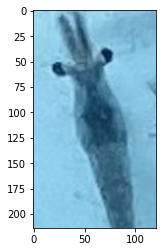

In [35]:
image = cv2.imread('D:/For Me/3_Dataset/Shrimp/crops/crop_image3.jpg')
plt.imshow(image)
plt.show()

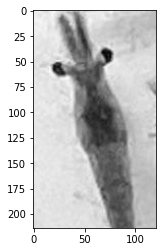

In [36]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

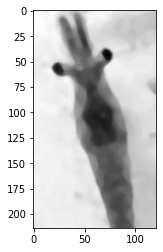

In [37]:
blur = cv2.medianBlur(gray, 7)
plt.imshow(blur, cmap='gray')
plt.show()

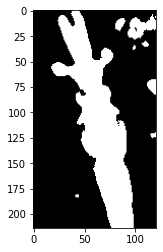

In [38]:
th2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 57, 8)
plt.imshow(th2, cmap='gray')
plt.show()

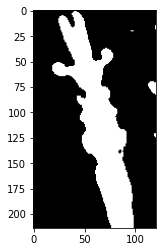

In [39]:
th2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 63, 14) # 63, 14
plt.imshow(th2, cmap='gray')
plt.show()

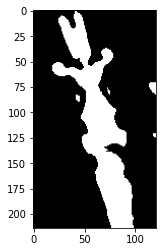

In [40]:
th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 95, 15)
plt.imshow(th3, cmap='gray')
plt.show()

In [41]:
# # Step 1: Create an empty skeleton
# size = np.size(th2)
# skel = np.zeros(th2.shape, np.uint8)

# # Get a Cross Shaped Kernel
# element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# # Repeat steps 2-4
# while True:
#     #Step 2: Open the image
#     open = cv2.morphologyEx(th2, cv2.MORPH_OPEN, element)
#     #Step 3: Substract open from the original image
#     temp = cv2.subtract(th2, open)
#     #Step 4: Erode the original image and refine the skeleton
#     eroded = cv2.erode(th2, element)
#     skel = cv2.bitwise_or(skel,temp)
#     th2 = eroded.copy()
#     # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
#     if cv2.countNonZero(th2)==0:
#         break

# plt.imshow(skel, cmap='gray')
# plt.show()

In [42]:
# # Step 1: Create an empty skeleton
# skel = np.zeros(th2.shape, np.uint8)

# # # Get a Cross Shaped Kernel
# element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# # Loop until erosion leads to an empty set
# while True:
#     # Erosion
#     erode = cv2.erode(th2, element)
#     # Opening on eroded image
#     opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, element)
#     # Subtract these two
#     subset = erode - opening
#     # Union of all previous sets
#     skel = cv2.bitwise_or(subset, skel)
#     # Set the eroded image for next iteration
#     th2 = erode.copy()

#     if cv2.countNonZero(th2)==0:
#         break

# plt.imshow(skel, cmap='gray')
# plt.show()

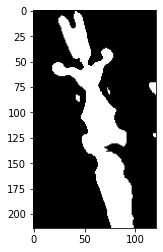

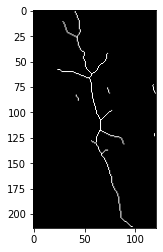

In [43]:
th3 = th3 / 255
skeleton = skeletonize(th3)
plt.imshow(th3, cmap='gray')
plt.show()
plt.imshow(skeleton, cmap='gray')
plt.show()

In [44]:
from utils import build_sknw

In [45]:
node, edge = build_sknw(skeleton)

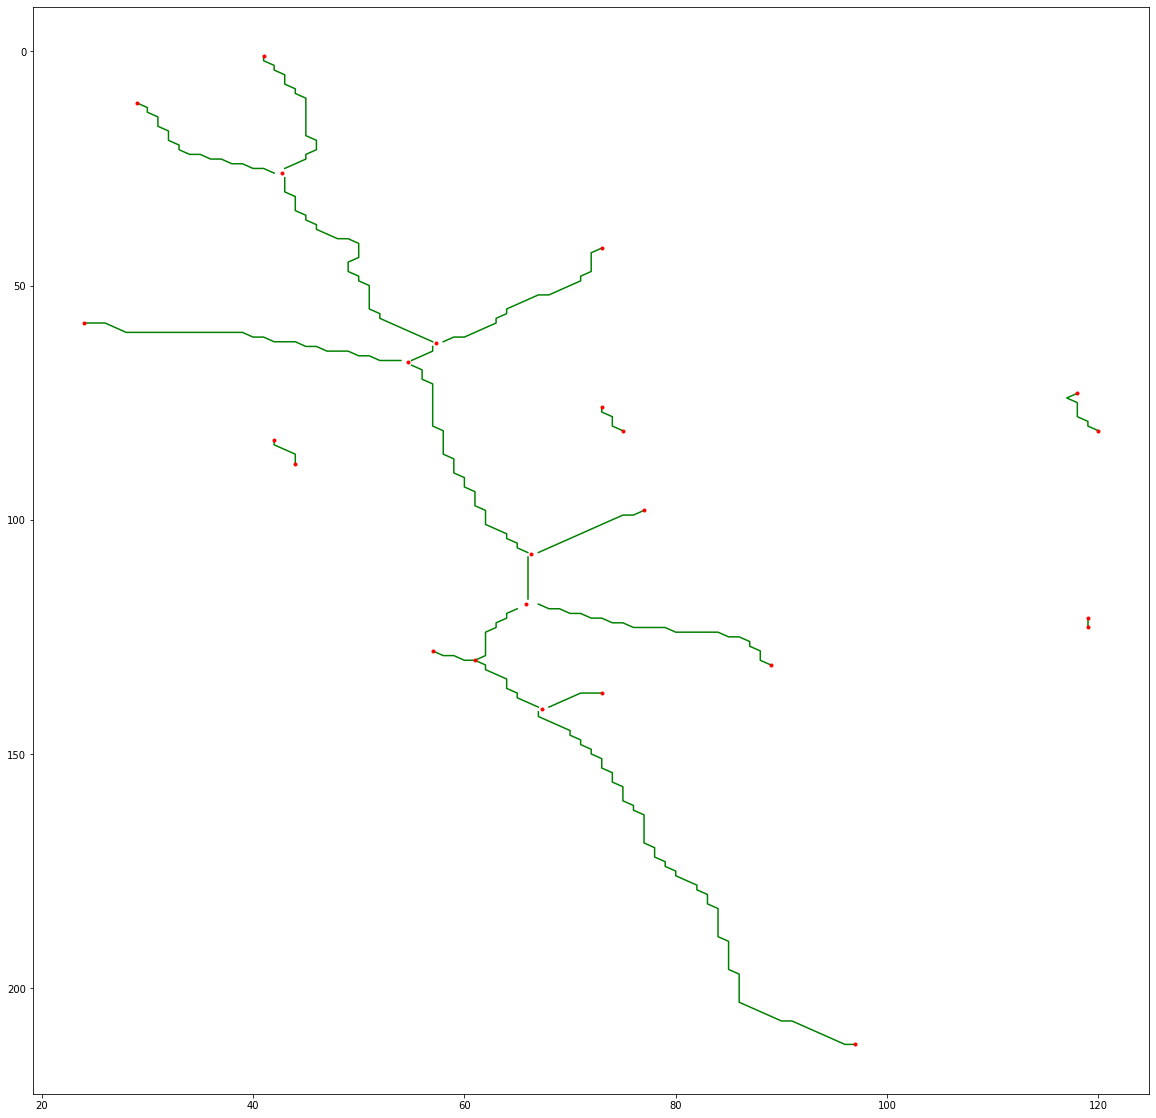

In [46]:
plt.figure(figsize=(20, 20))
for (s, e, p) in edge:
    # print(p)
    plt.plot(p[:, 1], p[:, 0], 'green')

for p in node:
    # print(p)
    # print(f"x: {int(p[:, 1].mean())} || y: {int(p[:, 0].mean())}")
    plt.plot(p[:, 1].mean(), p[:, 0].mean(), 'r.')


plt.gca().invert_yaxis()
plt.show()

In [384]:
start = []
for (s, e, p) in edge:
    print(f"start: {s} --> stop: {e}")

dd = np.array(edge)

start: 0 --> stop: 7
start: 1 --> stop: 3
start: 2 --> stop: 3
start: 3 --> stop: 8
start: 5 --> stop: 9
start: 6 --> stop: 7
start: 7 --> stop: 11
start: 9 --> stop: 12
start: 9 --> stop: 10
start: 12 --> stop: 11
start: 11 --> stop: 13
start: 12 --> stop: 16
start: 14 --> stop: 15
start: 17 --> stop: 18


D:\anaconda3\envs\shrimp-project\lib\site-packages\ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [385]:
def slope(x1, y1, x2, y2): # Line slope given two points:
    return (y2-y1)/(x2-x1)

def angle(s1, s2): 
    return abs(math.degrees(math.atan((s2-s1)/(1+(s2*s1)))))

# lineA = ((node[edge[0][0]][:, 1].mean(), node[edge[0][0]][:, 0].mean()), (node[edge[0][1]][:, 1].mean(), node[edge[0][1]][:, 0].mean()))
# lineB = ((node[1][:, 1].mean(), node[1][:, 0].mean()), (node[2][:, 1].mean(), node[2][:, 0].mean()))

# slope1 = slope(lineA[0][0], lineA[0][1], lineA[1][0], lineA[1][1])
# slope2 = slope(lineB[0][0], lineB[0][1], lineB[1][0], lineB[1][1])

# ang = angle(slope1, slope2)
# print('Angle in degrees = ', ang)

In [386]:
def find_shrimp_skeleton(node, edge):
    start_node = []
    end_node = []
    for (s, e, _) in edge:
        start_node.append(s)
        end_node.append(e)

    start_only = list(set(start_node) - set(end_node))
    edge = np.array(edge, dtype="object")
    result = []
    for start_n in start_only:
        print(f"start new line")
        shrimp_node = []
        select = start_n
        start_idx = (np.where(edge[:, 0] == select))[0][0]
        have = False
        while True:
            
            print(f"start_1: {edge[start_idx][0]} --> end_1: {edge[start_idx][1]}")
            node_start_1 = node[edge[start_idx][0]]
            node_end_1 = node[edge[start_idx][1]]

            shrimp_node.append(edge[start_idx][0])
            shrimp_node.append(edge[start_idx][1])

            line_1 = ((node_start_1[:, 1].mean(), node_start_1[:, 0].mean()), (node_end_1[:, 1].mean(), node_end_1[:, 0].mean()))
            slope1 = slope(line_1[0][0], line_1[0][1], line_1[1][0], line_1[1][1])

            next_idxs = (np.where(edge[:, 0] == edge[start_idx][1]))
            # print(next_idxs)
            
            if len(next_idxs[0]) > 0:
                best_angle = 90
                for next_idx in next_idxs[0]:
                    print(f"start_2: {edge[next_idx][0]} --> end_2: {edge[next_idx][1]}")
                    node_start_2 = node[edge[next_idx][0]]
                    node_end_2 = node[edge[next_idx][1]]
                    line_2 = ((node_start_2[:, 1].mean(), node_start_2[:, 0].mean()), (node_end_2[:, 1].mean(), node_end_2[:, 0].mean()))
                    slope2 = slope(line_2[0][0], line_2[0][1], line_2[1][0], line_2[1][1])
                    ang = angle(slope1, slope2)

                    if ang < 35:
                        print(ang)
                        if ang < best_angle:
                            print('new')
                            have = True
                            best_edge_idx = next_idx
                            best_angle = ang
            else:
                print('break')
                start_idx = None
                break

            # print(best_edge_idx)
            if start_idx != best_edge_idx and start_idx is not None:
                start_idx = best_edge_idx
            else:
                print('stop')
                start_idx = None
                break

            # print(select)
        if have:
            result.append(shrimp_node)

    return result

In [387]:
result = find_shrimp_skeleton(node, edge)

start new line
start_1: 0 --> end_1: 7
start_2: 7 --> end_2: 11
18.567507327454354
new
start_1: 7 --> end_1: 11
start_2: 11 --> end_2: 13
stop
start new line
start_1: 1 --> end_1: 3
start_2: 3 --> end_2: 8
2.1781873016121667
new
start_1: 3 --> end_1: 8
break
start new line
start_1: 2 --> end_1: 3
start_2: 3 --> end_2: 8
start_1: 3 --> end_1: 8
break
start new line
start_1: 5 --> end_1: 9
start_2: 9 --> end_2: 12
30.726016072780517
new
start_2: 9 --> end_2: 10
start_1: 9 --> end_1: 12
start_2: 12 --> end_2: 11
16.337301699572212
new
start_2: 12 --> end_2: 16
start_1: 12 --> end_1: 11
start_2: 11 --> end_2: 13
10.27609796163861
new
start_1: 11 --> end_1: 13
break
start new line
start_1: 6 --> end_1: 7
start_2: 7 --> end_2: 11
start_1: 11 --> end_1: 13
break
start new line
start_1: 14 --> end_1: 15
break
start new line
start_1: 17 --> end_1: 18
break


In [388]:
result

[[0, 7, 7, 11], [1, 3, 3, 8], [5, 9, 9, 12, 12, 11, 11, 13]]

In [392]:
def dist(p1, p2):
    x0 = p1[0] - p2[0]
    y0 = p1[1] - p2[1]
    return x0 * x0 + y0 * y0


def maxDist(p):
    n = len(p)
    maxm = 0

    for i in range(n):
        for j in range(i + 1, n):
            distance = dist(p[i], p[j])
            if maxm < distance:
                maxm = distance
                point_1 = p[i]
                point_2 = p[j]

    return math.sqrt(maxm), point_1, point_2


def find_shrimp_path(result):
    shrimp_path = []
    skip_idx = []
    for idx, path in enumerate(result):
        path = set(path)
        max_length = 0
        if not (idx in skip_idx):
            for o_idx, other_path in enumerate(result[idx + 1:]):
                other_path = set(other_path)
                intersec = path & other_path
                if len(intersec) > 2:
                    p_base = [[node[i][:, 1].mean(), node[i][:, 0].mean()] for i in path]
                    p_other = [[node[i][:, 1].mean(), node[i][:, 0].mean()] for i in other_path]

                    base_max = maxDist(p_base)
                    other_max = maxDist(p_other)
                    
                    skip_idx.append(o_idx + idx + 1)
                    if base_max[0] > other_max[0] and base_max[0] > max_length:
                        shrimp = path
                        max_length = base_max[0]
                    elif base_max[0] < other_max[0] and other_max[0] > max_length:
                        shrimp = other_path
                        max_length = base_max[0]

        if idx in skip_idx:
            continue
        elif max_length == 0:
            shrimp_path.append(path)
        else:
            shrimp_path.append(shrimp)

    
    return shrimp_path
                

In [393]:
shrimp_path = find_shrimp_path(result)

In [394]:
shrimp_path

[{0, 7, 11}, {1, 3, 8}, {5, 9, 11, 12, 13}]

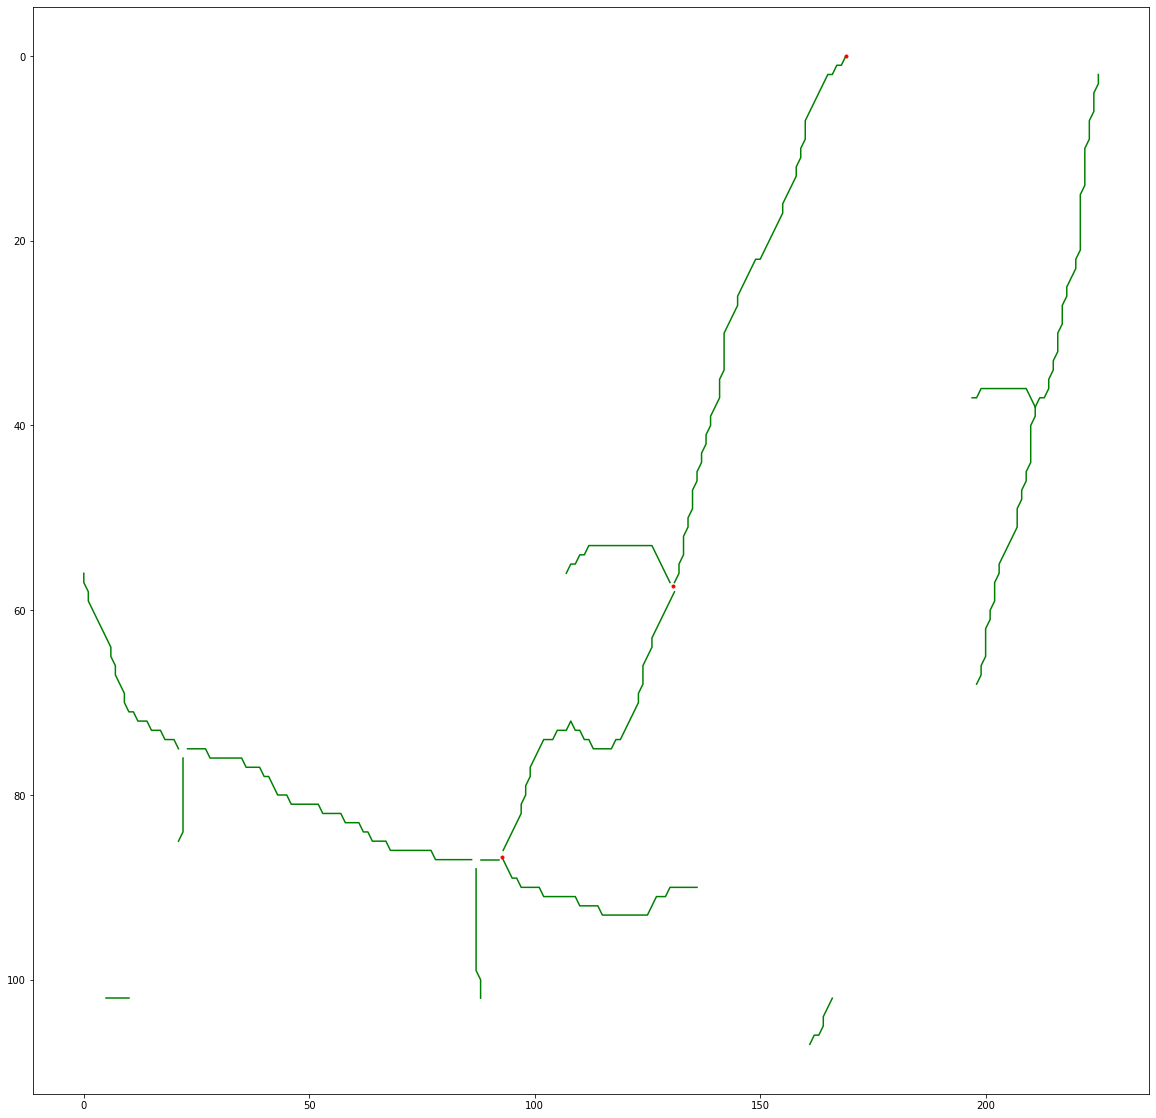

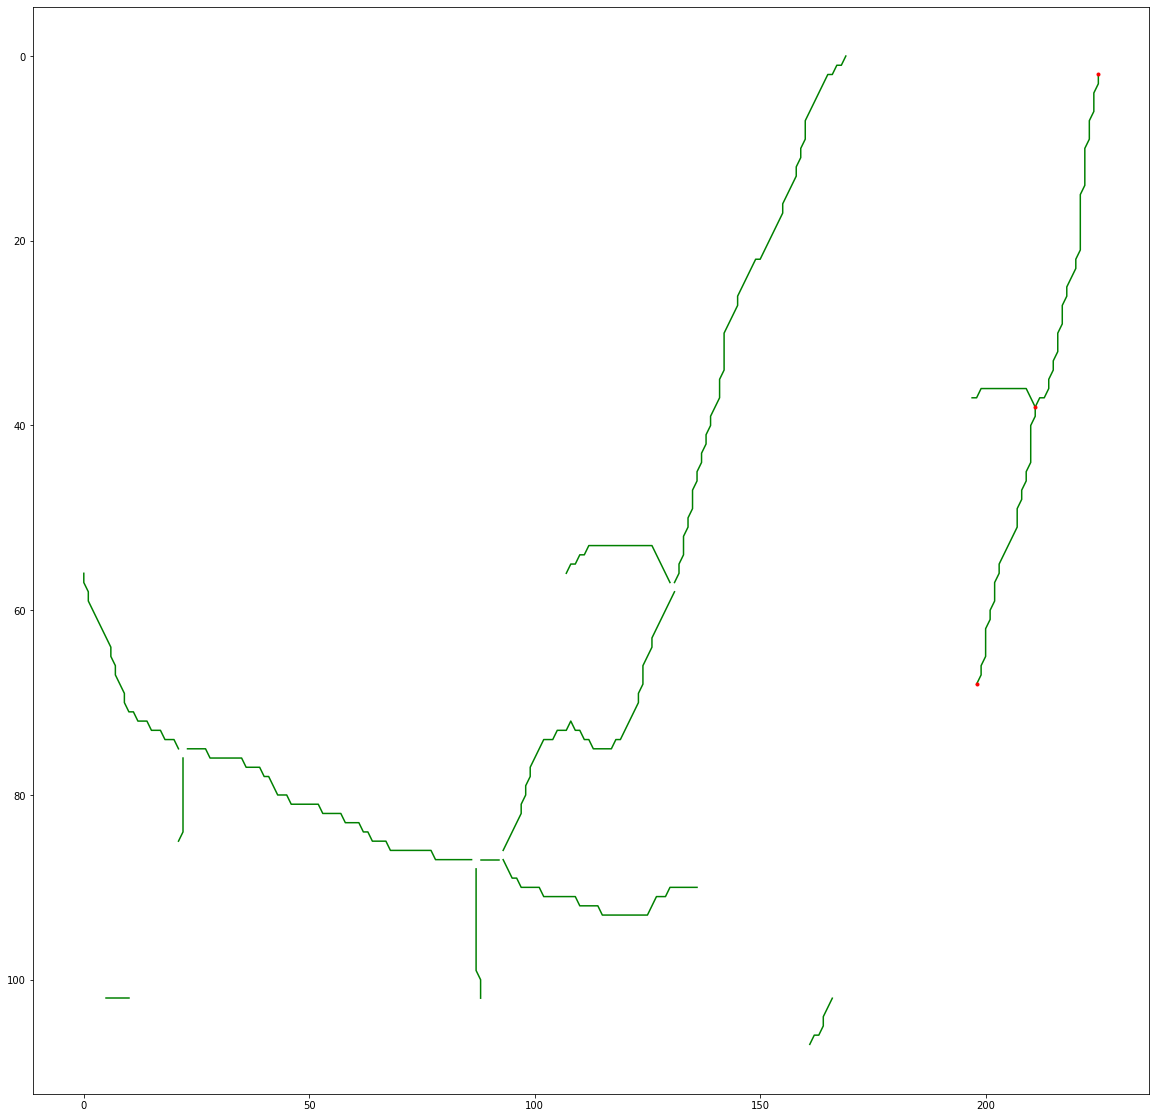

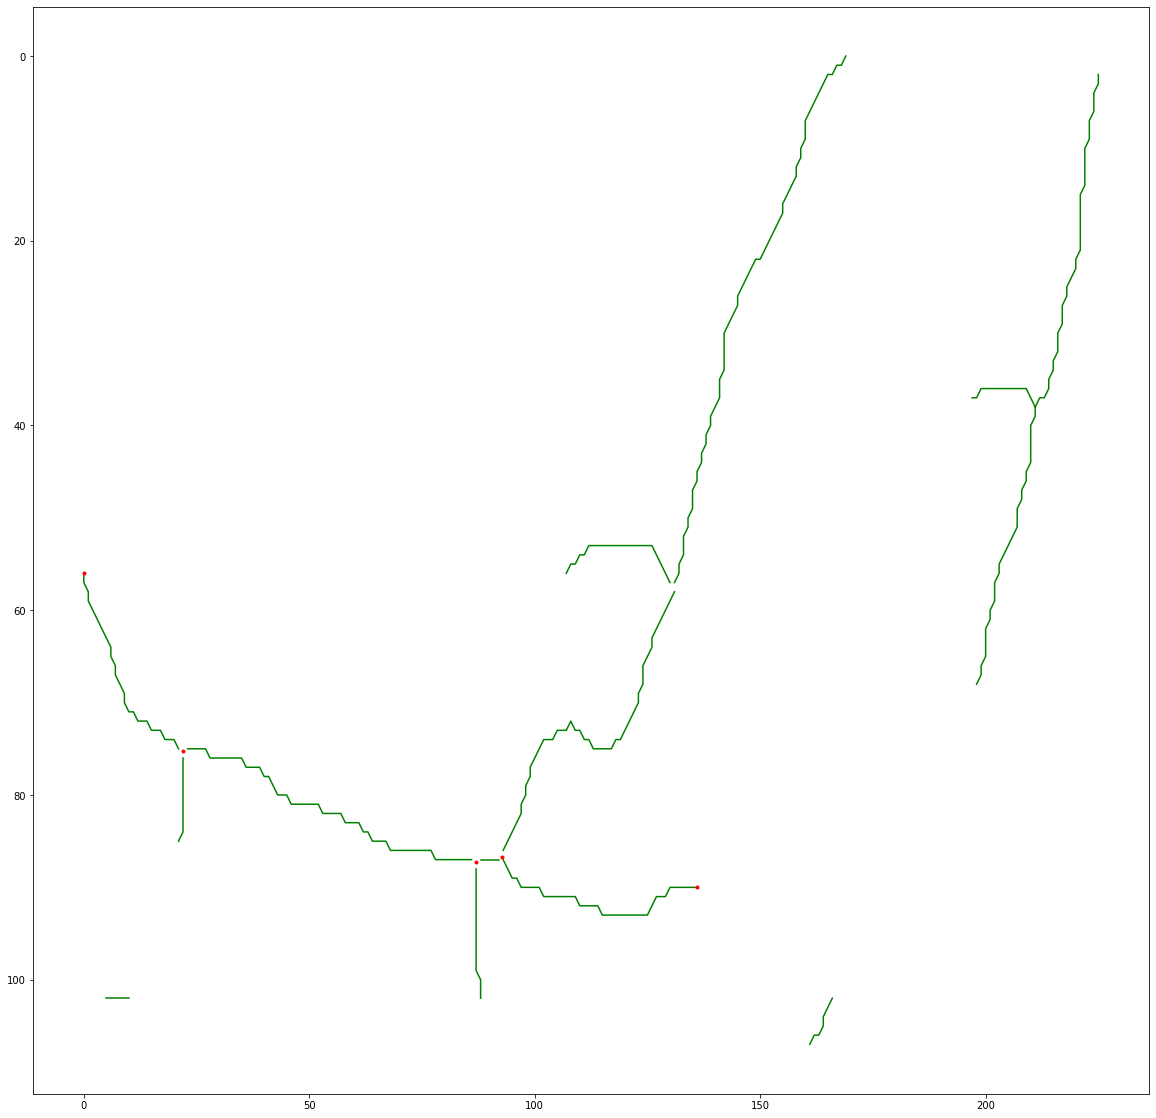

In [395]:
for n in shrimp_path:
    n_i = set(n)
    plt.figure(figsize=(20, 20))
    for (s, e, p) in edge:
        plt.plot(p[:, 1], p[:, 0], 'green')

    for idx in n_i:
        # print(idx)
        plt.plot(node[idx][:, 1].mean(), node[idx][:, 0].mean(), 'r.')

    plt.gca().invert_yaxis()
    plt.show()

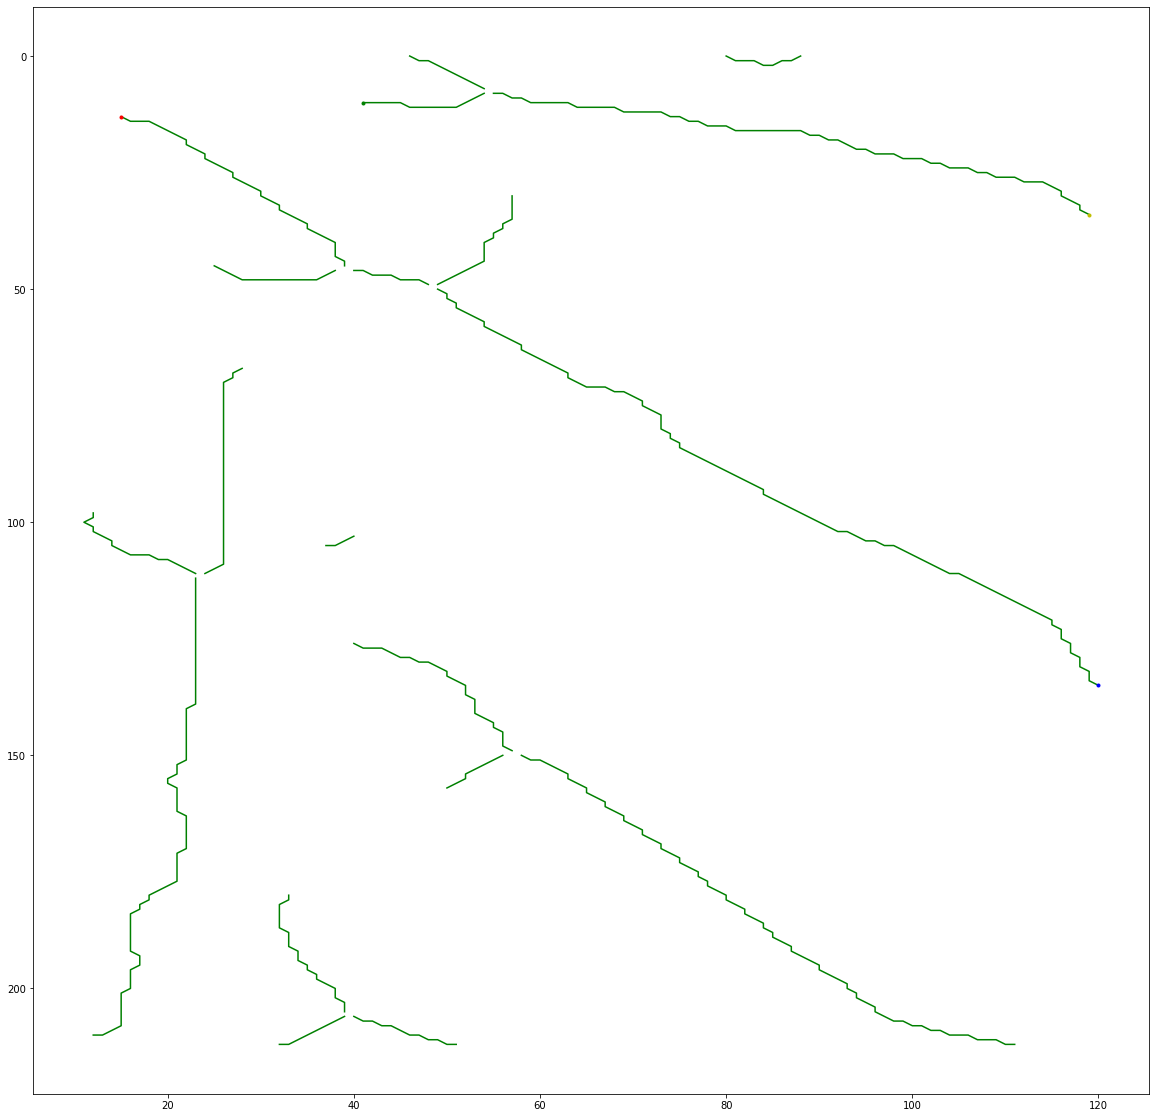

In [340]:
plt.figure(figsize=(20, 20))
for (s, e, p) in edge:
    plt.plot(p[:, 1], p[:, 0], 'green')

#5, 9, 9, 12, 12, 11, 11, 13
plt.plot(node[5][:, 1].mean(), node[5][:, 0].mean(), 'r.')
plt.plot(node[17][:, 1].mean(), node[17][:, 0].mean(), 'b.')
plt.plot(node[4][:, 1].mean(), node[4][:, 0].mean(), 'g.')
plt.plot(node[7][:, 1].mean(), node[7][:, 0].mean(), 'y.')
# plt.plot(node[13][:, 1].mean(), node[13][:, 0].mean(), 'b.')


plt.gca().invert_yaxis()
plt.show()

In [309]:
skeleton = skeleton * 255
np.unique(skeleton)
skeleton.shape

(118, 226)

In [311]:
tt = skeleton.astype('uint8')
np.unique(tt)

array([  0, 255], dtype=uint8)

left: (0, 57) || right: (169, 0) || top: (169, 0) || bottom: (88, 102)


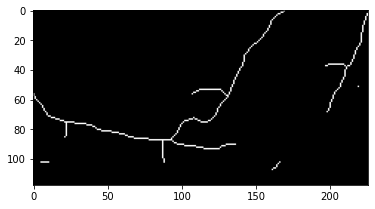

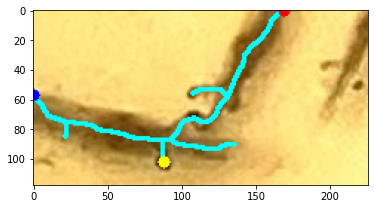

In [312]:
cnts = cv2.findContours(tt.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
minimum_area = 0
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for c in cnts:
    area = cv2.contourArea(c)
    if area > minimum_area:
        # Obtain outer coordinates
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])
        
        # Draw dots onto image
        cv2.drawContours(image_RGB, [c], -1, (0, 255, 255), 2)
        cv2.circle(image_RGB, extLeft, 4, (0, 0, 255), -1)
        cv2.circle(image_RGB, extRight, 4, (0, 255, 0), -1)
        cv2.circle(image_RGB, extTop, 4, (255, 0, 0), -1)
        cv2.circle(image_RGB, extBot, 4, (255, 255, 0), -1)

        print(f"left: {extLeft} || right: {extRight} || top: {extTop} || bottom: {extBot}")

        plt.imshow(skeleton, cmap='gray')
        plt.show()
        
        plt.imshow(image_RGB)
        plt.show()

In [284]:
result = []
for x in range(skeleton.shape[1]):
    for y in range(skeleton.shape[0]):
        if skeleton[y][x] == 1:
            result.append([x, y])

In [273]:
# # Step 1: Create an empty skeleton
# size = np.size(th2)
# skel = np.zeros(th2.shape, np.uint8)

# # Get a Cross Shaped Kernel
# element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
# done = False

# while (not done):
#     eroded = cv2.erode(th2,element)
#     temp = cv2.dilate(eroded,element)
#     temp = cv2.subtract(th2,temp)
#     skel = cv2.bitwise_or(skel,temp)
#     th2 = eroded.copy()
 
#     zeros = size - cv2.countNonZero(th2)
#     if zeros==size:
#         done = True

# plt.imshow(skel, cmap='gray')
# plt.show()

In [274]:
tmp = np.array(result)

In [275]:
from sklearn.cluster import DBSCAN, KMeans

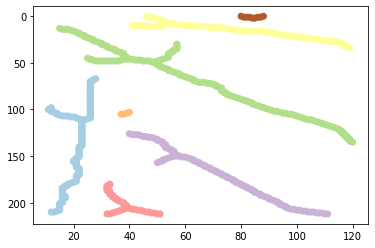

In [276]:
clustering = DBSCAN(eps=4, min_samples=3).fit(tmp)
y_pred = clustering.fit_predict(result)
plt.scatter(tmp[:, 0], tmp[:, 1], c=y_pred, cmap='Paired')
plt.gca().invert_yaxis()
plt.show()

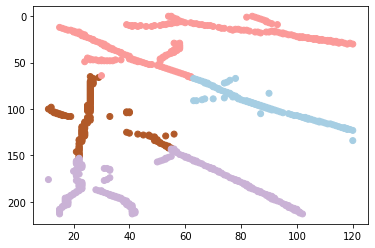

In [125]:
kmeans = KMeans(n_clusters=4).fit(tmp)
y_pred = kmeans.fit_predict(result)
plt.scatter(tmp[:, 0], tmp[:, 1], c=y_pred, cmap='Paired')
plt.gca().invert_yaxis()
plt.show()

# Find contord

In [345]:
def find_contour_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur = cv2.medianBlur(gray, 7)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 57, 8)
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    minimum_area = 500
    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for c in cnts:
        area = cv2.contourArea(c)
        if area > minimum_area:
            # Obtain outer coordinates
            extLeft = tuple(c[c[:, :, 0].argmin()][0])
            extRight = tuple(c[c[:, :, 0].argmax()][0])
            extTop = tuple(c[c[:, :, 1].argmin()][0])
            extBot = tuple(c[c[:, :, 1].argmax()][0])
            
            # Draw dots onto image
            cv2.drawContours(image_RGB, [c], -1, (0, 255, 255), 2)
            cv2.circle(image_RGB, extLeft, 4, (0, 0, 255), -1)
            cv2.circle(image_RGB, extRight, 4, (0, 255, 0), -1)
            cv2.circle(image_RGB, extTop, 4, (255, 0, 0), -1)
            cv2.circle(image_RGB, extBot, 4, (255, 255, 0), -1)

            print(f"left: {extLeft} || right: {extRight} || top: {extTop} || bottom: {extBot}")

            plt.imshow(thresh, cmap='gray')
            plt.show()
            
            plt.imshow(image_RGB)
            plt.show()


def find_contour_2(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blur = cv2.medianBlur(gray, 7)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 57, 8)
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Obtain outer coordinates
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    cv2.drawContours(image_RGB, [c], -1, (0, 255, 255), 2)
    cv2.circle(image_RGB, extLeft, 4, (0, 0, 255), -1)
    cv2.circle(image_RGB, extRight, 4, (0, 255, 0), -1)
    cv2.circle(image_RGB, extTop, 4, (255, 0, 0), -1)
    cv2.circle(image_RGB, extBot, 4, (255, 255, 0), -1)

    print(f"left: {extLeft} || right: {extRight} || top: {extTop} || bottom: {extBot}")

    plt.imshow(thresh, cmap='gray')
    plt.show()
    
    
    plt.imshow(image_RGB)
    plt.show()
    return c

In [346]:
image = cv2.imread('D:/For Me/3_Dataset/Shrimp/crops/crop_image18.jpg')

left: (32, 86) || right: (127, 2) || top: (98, 0) || bottom: (43, 142)


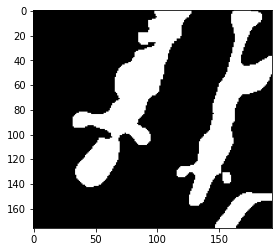

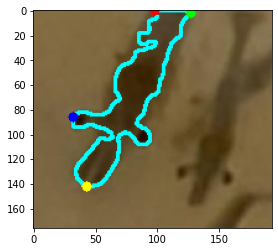

In [347]:
'''
Left => Blue
Right => Green
Top => Red
Bottom => Yellow
'''
c = find_contour_2(image)

# Find line from rostrum to telson

In [224]:
def dist(p1, p2):
    x0 = p1[0] - p2[0]
    y0 = p1[1] - p2[1]
    return x0 * x0 + y0 * y0


def maxDist(p):
    n = len(p)
    maxm = 0

    for i in range(n):
        for j in range(i + 1, n):
            distance = dist(p[i][0], p[j][0])
            if maxm < distance:
                maxm = distance
                point_1 = p[i][0]
                point_2 = p[j][0]

    return math.sqrt(maxm), point_1, point_2


def midpoint(p1, p2):
    return ((p1[0] + p2[0])/2, (p1[1] + p2[1])/2)


def find_line_rostrum_telson(image, c):
    distance, p1, p2 = maxDist(c)
    mid_point = midpoint(p1, p2)

    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.line(image_RGB, p1, p2, (255, 0, 0), thickness=1)
    plt.text(mid_point[0], mid_point[1], f"Lenght: {distance:.3f} pixels", fontsize = 10, fontweight='medium', color='limegreen')

    plt.imshow(image_RGB)
    plt.show()


In [226]:
# find_line_rostrum_telson(image, c)

# Find length with math

In [233]:
def slope(x1, y1, x2, y2): # Line slope given two points:
    return (y2-y1)/(x2-x1)


def angle(s1, s2): 
    return abs(math.degrees(math.atan((s2-s1)/(1+(s2*s1)))))


def find_shrimp_skeleton(node, edge):
    start_node = []
    end_node = []
    for (s, e, _) in edge:
        start_node.append(s)
        end_node.append(e)

    start_only = list(set(start_node) - set(end_node))
    edge = np.array(edge, dtype="object")
    result = []
    for start_n in start_only:
        shrimp_node = []
        select = start_n
        start_idx = (np.where(edge[:, 0] == select))[0][0]
        have = False
        best_edge_idx = -1
        while True:
            
            print(f"start_1: {edge[start_idx][0]} --> end_1: {edge[start_idx][1]}")
            node_start_1 = node[edge[start_idx][0]]
            node_end_1 = node[edge[start_idx][1]]

            shrimp_node.append(edge[start_idx][0])
            shrimp_node.append(edge[start_idx][1])

            line_1 = ((node_start_1[:, 1].mean(), node_start_1[:, 0].mean()), (node_end_1[:, 1].mean(), node_end_1[:, 0].mean()))
            slope1 = slope(line_1[0][0], line_1[0][1], line_1[1][0], line_1[1][1])

            next_idxs = (np.where(edge[:, 0] == edge[start_idx][1]))
            
            if len(next_idxs[0]) > 0:
                best_angle = 90
                for next_idx in next_idxs[0]:
                    print(f"start_2: {edge[next_idx][0]} --> end_2: {edge[next_idx][1]}")
                    node_start_2 = node[edge[next_idx][0]]
                    node_end_2 = node[edge[next_idx][1]]
                    line_2 = ((node_start_2[:, 1].mean(), node_start_2[:, 0].mean()), (node_end_2[:, 1].mean(), node_end_2[:, 0].mean()))
                    slope2 = slope(line_2[0][0], line_2[0][1], line_2[1][0], line_2[1][1])
                    ang = angle(slope1, slope2)

                    if ang < 35:
                        if ang < best_angle:
                            have = True
                            best_edge_idx = next_idx
                            best_angle = ang
            else:
                start_idx = None
                break

            if start_idx != best_edge_idx and start_idx is not None:
                start_idx = best_edge_idx
            else:
                start_idx = None
                break
            
        if have:
            result.append(shrimp_node)

    return result

In [234]:
def dist(p1, p2):
    x0 = p1[0] - p2[0]
    y0 = p1[1] - p2[1]
    return x0 * x0 + y0 * y0


def maxDist(p):
    n = len(p)
    maxm = 0

    for i in range(n):
        for j in range(i + 1, n):
            distance = dist(p[i], p[j])
            if maxm < distance:
                maxm = distance
                point_1 = p[i]
                point_2 = p[j]

    return math.sqrt(maxm), point_1, point_2


def midpoint(p1, p2):
    return ((p1[0] + p2[0])/2, (p1[1] + p2[1])/2)


def find_shrimp_path(shrimp_all_path):
    shrimp_path = []
    skip_idx = []
    for idx, path in enumerate(shrimp_all_path):
        path = set(path)
        max_length = 0
        if not (idx in skip_idx):
            for o_idx, other_path in enumerate(shrimp_all_path[idx + 1:]):
                other_path = set(other_path)
                intersec = path & other_path
                if len(intersec) >= 2:
                    p_base = [[node[i][:, 1].mean(), node[i][:, 0].mean()] for i in path]
                    p_other = [[node[i][:, 1].mean(), node[i][:, 0].mean()] for i in other_path]

                    base_max = maxDist(p_base)
                    other_max = maxDist(p_other)
                    
                    skip_idx.append(o_idx + idx + 1)
                    if base_max[0] > other_max[0] and base_max[0] > max_length:
                        shrimp = path
                        max_length = base_max[0]
                    elif base_max[0] < other_max[0] and other_max[0] > max_length:
                        shrimp = other_path
                        max_length = base_max[0]

        if idx in skip_idx:
            continue
        elif max_length == 0:
            shrimp_path.append(path)
        else:
            shrimp_path.append(shrimp)

    
    return shrimp_path

In [235]:
def find_length(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()

    blur = cv2.medianBlur(gray, 7)
    plt.imshow(blur, cmap='gray')
    plt.show()
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 95, 15)
    # thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 63, 14) # 63, 14
    plt.imshow(thresh, cmap='gray')
    plt.show()
   
    # find node and edge from skeleton
    skeleton = skeletonize(thresh / 255)
    plt.imshow(skeleton, cmap='gray')
    plt.show()
    node, edge = build_sknw(skeleton)

    shrimp_all_path = find_shrimp_skeleton(node, edge)
    print(shrimp_all_path)
    shrimp_path = find_shrimp_path(shrimp_all_path)
    print(shrimp_path)

    result = []
    for idx, path in enumerate(shrimp_path):
        n_path = [[node[i][:, 1].mean(), node[i][:, 0].mean()] for i in path]
        result.append(maxDist(n_path))

    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for idx, data in enumerate(result):
        mid_point = midpoint(data[1], data[2])
        cv2.line(image_RGB, list(map(int, data[1])), list(map(int, data[2])), (255, 0, 0), thickness=1)
        plt.text(mid_point[0], mid_point[1], f"Lenght: {data[0]:.3f} pixels", fontsize = 10, fontweight='medium', color='limegreen')
    
    plt.imshow(image_RGB)
    plt.show()

    return result

# Find length shrimp with contour

In [247]:
def dist(p1, p2):
    x0 = p1[0] - p2[0]
    y0 = p1[1] - p2[1]
    return x0 * x0 + y0 * y0


def maxDist(p):
    n = len(p)
    maxm = 0

    for i in range(n):
        for j in range(i + 1, n):
            distance = dist(p[i][0], p[j][0])
            if maxm < distance:
                maxm = distance
                point_1 = p[i][0]
                point_2 = p[j][0]

    return math.sqrt(maxm), point_1, point_2


def midpoint(p1, p2):
    return ((p1[0] + p2[0])/2, (p1[1] + p2[1])/2)


def find_length_2(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()

    blur = cv2.medianBlur(gray, 7)
    plt.imshow(blur, cmap='gray')
    plt.show()
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 95, 15)
    # thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 63, 14) # 63, 14
    plt.imshow(thresh, cmap='gray')
    plt.show()
   
    # find node and edge from skeleton
    skeleton = skeletonize(thresh / 255)
    plt.imshow(skeleton, cmap='gray')
    plt.show()

    skeleton = (skeleton * 255).astype('uint8')

    cnts = cv2.findContours(skeleton.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    minimum_area = 0
    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for c in cnts:
        area = cv2.contourArea(c)
        if area > minimum_area:
            # Obtain outer coordinates
            extLeft = tuple(c[c[:, :, 0].argmin()][0])
            extRight = tuple(c[c[:, :, 0].argmax()][0])
            extTop = tuple(c[c[:, :, 1].argmin()][0])
            extBot = tuple(c[c[:, :, 1].argmax()][0])
            
            # Draw dots onto image
            cv2.drawContours(image_RGB, [c], -1, (0, 255, 255), 2)
            cv2.circle(image_RGB, extLeft, 4, (0, 0, 255), -1)
            cv2.circle(image_RGB, extRight, 4, (0, 255, 0), -1)
            cv2.circle(image_RGB, extTop, 4, (255, 0, 0), -1)
            cv2.circle(image_RGB, extBot, 4, (255, 255, 0), -1)
            
            plt.imshow(image_RGB)
            plt.show()

    image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for c in cnts:
        area = cv2.contourArea(c)
        if area > minimum_area:
            distance, p1, p2 = maxDist(c)
            mid_point = midpoint(p1, p2)

            cv2.line(image_RGB, p1, p2, (255, 0, 0), thickness=1)
            plt.text(mid_point[0], mid_point[1], f"Lenght: {distance:.3f} pixels", fontsize = 10, fontweight='medium', color='limegreen')

    plt.imshow(image_RGB)
    plt.show()
            
    

# Main

In [242]:
# image = cv2.imread('D:/For Me/3_Dataset/Shrimp/crops/crop_image3.jpg')
# c = find_contour_2(image)
# find_line_rostrum_telson(image, c)

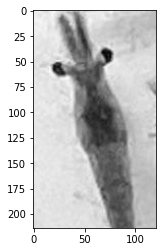

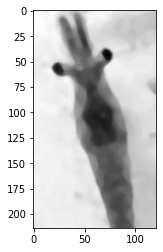

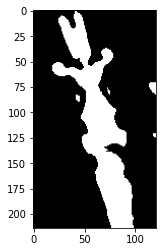

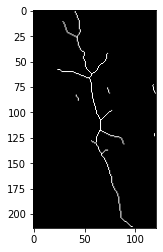

start_1: 0 --> end_1: 2
start_2: 2 --> end_2: 5
start_1: 2 --> end_1: 5
start_2: 5 --> end_2: 6
start_1: 1 --> end_1: 2
start_2: 2 --> end_2: 5
start_1: 2 --> end_1: 5
start_2: 5 --> end_2: 6
start_1: 3 --> end_1: 5
start_2: 5 --> end_2: 6
start_1: 5 --> end_1: 6
start_2: 6 --> end_2: 14
start_1: 4 --> end_1: 6
start_2: 6 --> end_2: 14
start_1: 22 --> end_1: 23
start_1: 7 --> end_1: 10
start_1: 8 --> end_1: 9
start_1: 11 --> end_1: 12
start_1: 13 --> end_1: 14
start_2: 14 --> end_2: 15
start_1: 22 --> end_1: 23
start_1: 16 --> end_1: 17
start_1: 18 --> end_1: 19
start_2: 19 --> end_2: 22
start_1: 19 --> end_1: 22
start_2: 22 --> end_2: 23
start_1: 22 --> end_1: 23
start_1: 21 --> end_1: 22
start_2: 22 --> end_2: 23
start_1: 22 --> end_1: 23
[[0, 2, 2, 5], [1, 2, 2, 5], [3, 5, 5, 6], [18, 19, 19, 22, 22, 23]]


D:\anaconda3\envs\shrimp-project\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


IndexError: invalid index to scalar variable.

In [243]:
image = cv2.imread('D:/For Me/3_Dataset/Shrimp/crops/crop_image3.jpg')
result = find_length(image)

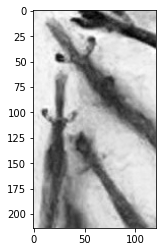

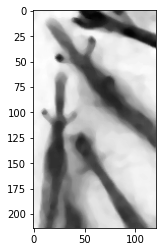

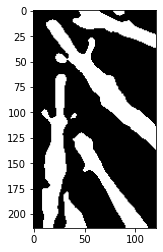

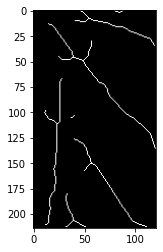

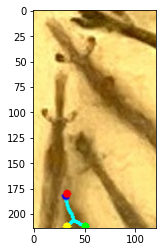

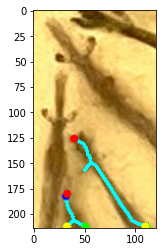

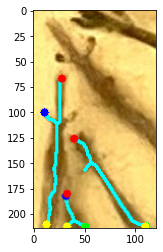

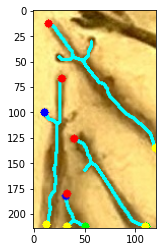

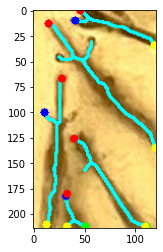

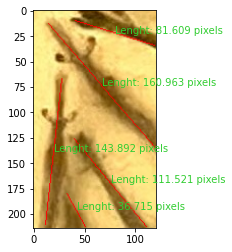

In [249]:
image = cv2.imread('D:/For Me/3_Dataset/Shrimp/crops/crop_image1.jpg')
result = find_length_2(image)